In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image

%matplotlib inline
from matplotlib.image import imread

# Split images into testing, training and validation folder



In [2]:
import os
import numpy as np
import shutil
import random

dataset_dir = '/content/drive/MyDrive/Assignment/medical_mask_selfie/' # data root path
FOLDER_NAME = [] #total labels

val_ratio = 0.20
train_ratio = 0.60


for i in range(1,162) :
    FOLDER_NAME.append(str(i))
print (FOLDER_NAME)

for class_num in FOLDER_NAME:

    if os.path.exists(dataset_dir +'training_datas/' + class_num) :
        print("Done")
    else :
        try :
            os.makedirs(dataset_dir +'training_datas/' + class_num)
            os.makedirs(dataset_dir +'validation_datas/' + class_num)
            os.makedirs(dataset_dir +'testing_datas/' + class_num)
        except : 
            pass

        class_path = dataset_dir + class_num # Folder to copy images from

        all_file = os.listdir(class_path)
        np.random.shuffle(all_file)
        train_file, val_file, test_file = np.split(np.array(all_file),
                                                   [int(len(all_file)* train_ratio), 
                                                   int(len(all_file)* (1 - val_ratio))])


        train_file = [class_path +'/'+ name for name in train_file.tolist()]
        val_file = [class_path +'/' + name for name in val_file.tolist()]
        test_file = [class_path +'/' + name for name in test_file.tolist()]


        # Copy-pasting images

        for name in train_file:
            shutil.copy(name, dataset_dir +'training_datas/' + class_num)

        for name in val_file:
            shutil.copy(name, dataset_dir +'validation_datas/' + class_num)

        for name in test_file:
            shutil.copy(name, dataset_dir +'testing_datas/' + class_num)

        print('Total images: ', len(all_file))
        print('Training: ', len(train_file))
        print('Validation: ', len(val_file))
        print('Testing: ', len(test_file))


### Load training data

In [3]:
# import os
# import cv2

# train_images = []
# train_label = []
# FOLDER_NAME = []
# DATADIR = "/content/drive/MyDrive/Assignment/medical_mask_selfie/training_datas/"


# for i in range(0,161) :
#     FOLDER_NAME.append(str(i))
# print (FOLDER_NAME)

# def load_train_images(folder,i):
#       for filename in os.listdir(folder):
#           if any([filename.endswith(x) for x in ['.jpeg', '.jpg']]):
#             img = imread(os.path.join(folder, filename))
#             resized_image = cv2.resize(img,(64,48))
#             if resized_image is not None:
#               train_images.append(resized_image)
#               train_label.append(i)
#       return train_images, train_label

# for i in range(0,161): #change to 162
#     folders = "/content/drive/MyDrive/Assignment/medical_mask_selfie/training_datas/" + str(i+1) #change folder name
#     training_images= load_train_images(folders,i)
#     print("Done", i)

### Load testing data

In [4]:
# import os
# import cv2

# test_images = []
# test_label = []
# FOLDER_NAME = []
# DATADIR = "/content/drive/MyDrive/Assignment/medical_mask_selfie/testing_datas/"


# for i in range(0,161) :
#     FOLDER_NAME.append(str(i))
# print (FOLDER_NAME)

# def load_test_images(folder,i):
#       for filename in os.listdir(folder):
#           if any([filename.endswith(x) for x in ['.jpeg', '.jpg']]):
#             img = imread(os.path.join(folder, filename))
#             resized_image = cv2.resize(img,(64,48))
#             if resized_image is not None:
#               test_images.append(resized_image)
#               test_label.append(i)
#       return test_images, test_label

# for i in range(0,161): #change to 162
#     folders = "/content/drive/MyDrive/Assignment/medical_mask_selfie/testing_datas/" + str(i+1) #change folder name
#     testing_images= load_test_images(folders,i)
#     print("Done", i)

### Load validation data

In [5]:
# import os
# import cv2

# valid_images = []
# validation_label = []
# FOLDER_NAME = []
# DATADIR = "/content/drive/MyDrive/Assignment/medical_mask_selfie/validation_datas/"


# for i in range(0,161) :
#     FOLDER_NAME.append(str(i))
# print (FOLDER_NAME)

# def load_validation_images(folder,i):
#       for filename in os.listdir(folder):
#           if any([filename.endswith(x) for x in ['.jpeg', '.jpg']]):
#             img = imread(os.path.join(folder, filename))
#             resized_image = cv2.resize(img,(64,48))
#             if resized_image is not None:
#               valid_images.append(resized_image)
#               validation_label.append(i)
#       return valid_images, validation_label

# for i in range(0,161): #change to 162
#     folders = "/content/drive/MyDrive/Assignment/medical_mask_selfie/validation_datas/" + str(i+1) #change folder name
#     validation_images= load_validation_images(folders,i)
#     print("Done", i)

### Import data and convert training,testing and validation list to numpy array

In [6]:
import h5py
train_set = h5py.File('C:/Users/60165/Downloads/training.h5', 'r') #rmb to close file test_set.close()
X_train = train_set.get('train_dataset')
X_train

<HDF5 dataset "train_dataset": shape (48300, 48, 64, 3), type "|u1">

In [7]:
X_train = np.array(X_train)
X_train.shape

(48300, 48, 64, 3)

In [8]:
train_labels = h5py.File('C:/Users/60165/Downloads/training_label.h5', 'r')
y_train = train_labels.get('training_label_dataset')
y_train

<HDF5 dataset "training_label_dataset": shape (48300,), type "<i4">

In [9]:
test_set = h5py.File('C:/Users/60165/Downloads/test.h5', 'r')
X_test= test_set.get('test_dataset')
X_test

<HDF5 dataset "test_dataset": shape (16100, 48, 64, 3), type "|u1">

In [10]:
test_labels = h5py.File('C:/Users/60165/Downloads/testing_label.h5', 'r')
y_test = test_labels.get('testing_label_dataset')
y_test

<HDF5 dataset "testing_label_dataset": shape (16100,), type "<i4">

In [11]:
validation_set = h5py.File('C:/Users/60165/Downloads/validation.h5', 'r')
X_validation= validation_set.get('validation_dataset')
X_validation

<HDF5 dataset "validation_dataset": shape (16100, 48, 64, 3), type "|u1">

In [12]:
validation_labels = h5py.File('C:/Users/60165/Downloads/validation_label.h5', 'r')
y_validation = validation_labels.get('validation_label_dataset')
y_validation

<HDF5 dataset "validation_label_dataset": shape (16100,), type "<i4">

In [13]:
X_test = np.array(X_test)
X_validation = np.array(X_validation)
X_validation.shape

(16100, 48, 64, 3)

In [14]:
y_train_numpy = np.array(y_train)
y_test_numpy = np.array(y_test)
y_validation_numpy = np.array(y_validation)
y_test_numpy.shape

(16100,)

### One Hot Encoding


In [15]:
#one hot encode y_train 
classes = 161
y_train = np.eye(classes)[y_train_numpy]

In [16]:
y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [17]:
#one hot encode y_test
classes = 161
y_test = np.eye(classes)[y_test_numpy]

In [18]:
y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [19]:
#one hot encode y_validation
classes = 161
y_validation = np.eye(classes)[y_validation_numpy]

In [20]:
y_validation

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

### CrossCheck our data

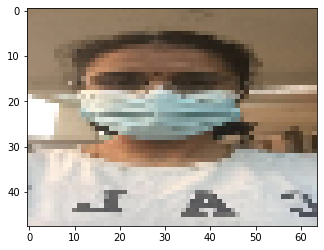

In [21]:
plt.imshow(X_train[350])

In [22]:
y_train[350]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

### **Pre-Processing Images**

In [23]:
X_train = X_train[:]/255
X_test = X_test[:]/255
X_validation = X_validation[:]/255

In [24]:
X_train.shape

(48300, 48, 64, 3)

In [25]:
X_validation.shape

(16100, 48, 64, 3)

In [26]:
#Reshape it to 2D
X_train = X_train.reshape(48300, 48*64*3)
X_test = X_test.reshape(16100, 48*64*3)
X_validation = X_validation.reshape(16100, 48*64*3)

## **Random Forest**

### **Random Forest (Model 1)**

In [31]:
model1 = RandomForestClassifier(n_estimators = 100 , random_state = 42) #(no of trees, random_state = set)
model1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [38]:
pred_1 = model1.predict(X_validation) 

MODEL 1 PERFORMANCE
Confusion Matrix

 [[100   0   0 ...   0   0   0]
 [ 33  67   0 ...   0   0   0]
 [ 23   0  77 ...   0   0   0]
 ...
 [100   0   0 ...   0   0   0]
 [ 99   0   0 ...   0   1   0]
 [100   0   0 ...   0   0   0]]
              precision    recall  f1-score   support

           0       1.00      0.69      0.82       100
           1       1.00      0.67      0.80       100
           2       1.00      0.77      0.87       100
           3       1.00      0.87      0.93       100
           4       1.00      0.85      0.92       100
           5       1.00      0.35      0.52       100
           6       1.00      0.30      0.46       100
           7       1.00      0.38      0.55       100
           8       1.00      0.33      0.50       100
           9       1.00      0.05      0.10       100
          10       1.00      0.11      0.20       100
          11       1.00      0.34      0.51       100
          12       0.00      0.00      0.00       100
          13

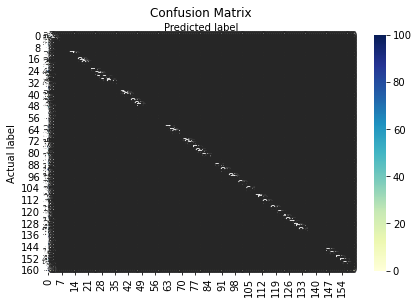

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd

errors_rate = abs(pred_1- y_validation)
conf_max = confusion_matrix(y_validation.argmax(axis = 1), pred_1.argmax(axis = 1))
model1_accuracy = accuracy_score(y_validation, pred_1)

def plot_confusion_matrix(conf_max ):
  class_names = np.array(y_train)
  fig, ax = plt.subplots()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)

  sns.heatmap(pd.DataFrame(conf_max), annot = True, cmap  ='YlGnBu', fmt='g')
  ax.xaxis.set_label_position("top")

  plt.tight_layout()
  plt.title("Confusion Matrix")
  plt.ylabel("Actual label")
  plt.xlabel("Predicted label")

print ("MODEL 1 PERFORMANCE")
plot_confusion_matrix(conf_max)
print("Confusion Matrix\n\n",conf_max)
print(classification_report(y_validation,pred_1))
print("Accuracy : {:.2%}".format(model1_accuracy))
print ("Error Rate :{:.6f} ".format(np.mean(errors_rate)))